In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6
warnings.filterwarnings('ignore')

In [29]:
import os 
os.chdir('C:\\College\\Machine Learnings\\Part 2 - Regression\\Section 6 - Polynomial Regression\\Polynomial_Regression')
os.getcwd()

'C:\\College\\Machine Learnings\\Part 2 - Regression\\Section 6 - Polynomial Regression\\Polynomial_Regression'

In [30]:
dataset = pd.read_csv('Position_Salaries.csv')

In [31]:
##################### Missing values ############################

dataset.columns
X= dataset.iloc[:,1:2].values
Y= dataset.iloc[:,len(dataset.columns)-1:].values

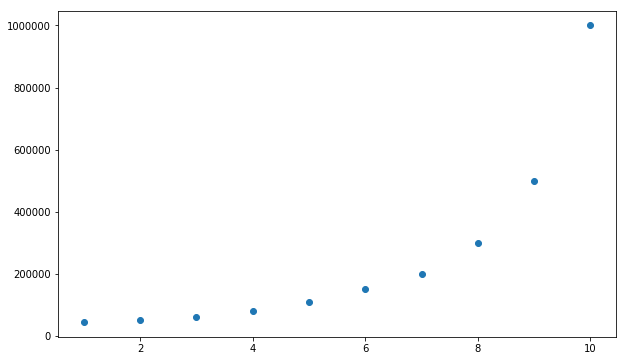

In [32]:
###############3 Lets look at the graph to decide whether to use Linear or Polynomial Graph #############
plt.scatter(X,Y)
plt.show()
### The graph looks similar to polynomial features 
### So we would do both linear and polynomial and test the result on both

In [33]:
###### Missing values ##############################
#### No Missing values ######################################
dataset[dataset['Position'].isna()]
dataset[dataset['Level'].isna()]
dataset[dataset['Salary'].isna()]

,Position,Level,Salary


In [34]:
### For SVR Feature Scaling is extremely important ###############
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_Y =StandardScaler()
X = sc_X.fit_transform(X)
Y =sc_Y.fit_transform(Y)

In [35]:
###########  To Plot Level Vs Salary
### No Categorical variables so we can skip this part ##############################
###### Dataset is Low and we need actual prediction so we can skip the train and test set in this case ##################3
#### Feature scaling not required for 1 vs 1 variable ################################

In [46]:
from sklearn.svm import SVR
svr =SVR(kernel='rbf')
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

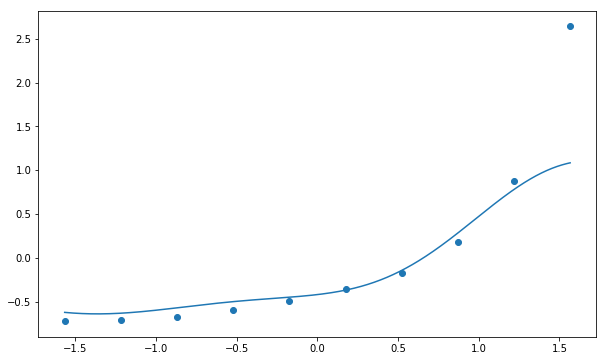

In [47]:
plt.scatter(X,Y)
X_grid = np.arange(min(X),max(X),0.001)
X_grid = X_grid.reshape((len(X_grid),1))
plt.plot(X_grid,svr.predict(X_grid))
plt.show()

In [60]:
sc_Y.inverse_transform(svr.predict(sc_X.fit_transform(np.array([[6.5]]))))

array([ 131106.77303274])